# Question 7.1 - Print top 5 predictions for random selection of 4 images from Cats&Dogs dataset using VGG16 pretrained model.

In [1]:
#Modified from https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3

from keras.models import Sequential
from tensorflow.python import pywrap_tensorflow
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np
import h5py
import json
from keras import backend as K
K.set_image_dim_ordering('th')

fname = 'imagenet_class_index.json'
with open(fname,'r') as f:
    class_dict = json.load(f)
classes = [class_dict[str(i)][1] for i in range(len(class_dict))]

def VGG_16(weights_path=None):
        model = Sequential()
        model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
        model.add(Convolution2D(64, 3, 3, activation='relu'))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(64, 3, 3, activation='relu'))
        model.add(MaxPooling2D((2,2), strides=(2,2),dim_ordering="th"))

        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(128, 3, 3, activation='relu'))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(128, 3, 3, activation='relu'))
        model.add(MaxPooling2D((2,2), strides=(2,2),dim_ordering="th"))

        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(256, 3, 3, activation='relu'))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(256, 3, 3, activation='relu'))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(256, 3, 3, activation='relu'))
        model.add(MaxPooling2D((2,2), strides=(2,2),dim_ordering="th"))

        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(512, 3, 3, activation='relu'))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(512, 3, 3, activation='relu'))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(512, 3, 3, activation='relu'))
        model.add(MaxPooling2D((2,2), strides=(2,2),dim_ordering="th"))

        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(512, 3, 3, activation='relu'))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(512, 3, 3, activation='relu'))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(512, 3, 3, activation='relu'))
        model.add(MaxPooling2D((2,2), strides=(2,2),dim_ordering="th"))

        model.add(Flatten())
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(1000, activation='softmax'))

        if weights_path:
            model.load_weights(weights_path)

        return model

# Test pretrained model
model = VGG_16('vgg16_weights.h5')
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

Using TensorFlow backend.


['Band_Aid' 'banded_gecko' 'beagle' 'boa_constrictor' 'king_snake']


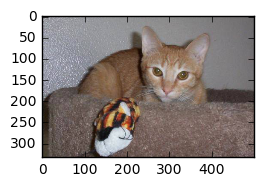

['unicycle' 'hummingbird' 'balance_beam' 'tricycle' 'Christmas_stocking']


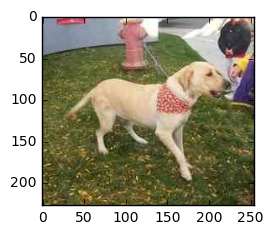

['whippet' 'Ibizan_hound' 'French_bulldog' 'beagle' 'Chihuahua']


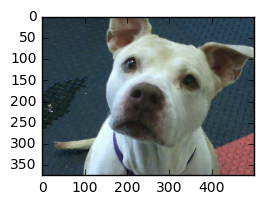

['Angora' 'English_setter' 'Lhasa' 'clumber' 'fur_coat']


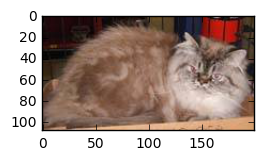

In [7]:
from scipy.misc import imread, imresize
%matplotlib inline
import matplotlib.pyplot as plt
import os
import random

src_dir = 'test'   # set source directory to select images
src_files = (os.listdir(src_dir))

def valid_path(dir_path, filename):
    full_path = os.path.join(dir_path, filename)
    return os.path.isfile(full_path) 

files = [os.path.join(src_dir, f) for f in src_files if valid_path(src_dir, f)]
choices = random.sample(files, 4)
for files in choices:
    im = cv2.resize(cv2.imread(files), (224, 224)).astype(np.float32)
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)

    scores = np.array(model.predict(im))
    scores=scores.reshape(1000)
    top5index = np.array(sorted(range(len(scores)), key=lambda i: scores[i])[-5:])
    classes=np.array(classes)
    print (classes[top5index])

    # Show the original image
    plt.subplot(1, 2, 1)
    plt.imshow(np.uint8(imread(files)))
    plt.show()